## Homework3
### Harshil Patel(306646748)

#### Problem2: Face Recognition Using SVM:

a- Download the dataset “Face” from CSNS (it is in the HW3 package). Check out the dataset. Open some of the jpg images. This is an image dataset from AT&T research lab. It includes 400 faces (64x64 pixels) from 40 people (10 images per person).
You have to also download the csv file that includes the labels of the images (the label is person’s ID. The file is in the same HW3 package). The goal is to build a Face Recognition algorithm to recognize each person using PCA dim-reduction and a non-linear SVM.
you can use:
mpimg.imread(file_name) to load an image, and
plt.imshow(image_name, cmap=plt.cm.gray) to show an image (This is a little different from what we had before!). Add %matplotlib inline at top of your code to make sure that the images will be shown inside the Jupyter explorer page.

In [124]:
from sklearn.datasets import fetch_olivetti_faces

In [136]:
%matplotlib inline
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV


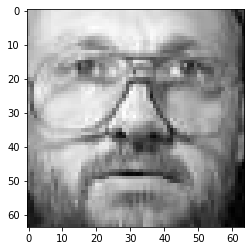

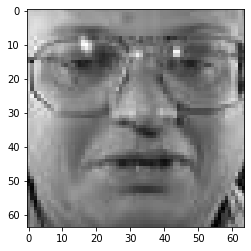

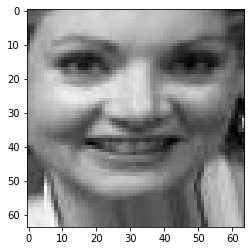

In [137]:
%matplotlib inline

images = []

for i in range(0, 400):
  filename = i
  filename = "/Users/CSULA_COURSES/cs4662/Homework/HW3/Face Data/" + str(filename) + ".jpg"
  images.append(mpimg.imread(filename))

for i in range(0, 3):
  plt.imshow(images[i], cmap=plt.cm.gray)
  plt.show()

b- Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 64x64 image into a row of the feature matrix with 4096 columns (i.e 4096 features for 4096 pixels).

In [144]:
df = []

for i in range(0, len(images)):
  aux = []
  for x in images[i]:
    for y in x:
      aux.append(y)
  df.append(np.array(aux))

# Feature Matrix
X = pd.DataFrame(data=df)

df = pd.read_csv("/Users/CSULA_COURSES/cs4662/Homework/HW3/Face Data/label.csv")

# Label Vector
y = df["Label"]

print(X.shape)
print(y.shape)

(400, 4096)
(400,)


c- Normalize each column of your feature matrix using preprocessing.scale (This is required!).

In [139]:
X = scale(X)

print(X[0:5])

[[ 1.37649641  1.11885303  0.79610373 ... -1.17094622 -1.24726506
  -1.21711982]
 [ 1.68113398  1.3654141   1.03570156 ...  0.68710075  1.48558299
   1.58234648]
 [-0.31593455 -0.59063704 -0.75329558 ...  1.84210291  1.84204144
   1.13304942]
 [-0.73904229 -0.40982559 -0.49772456 ...  1.10557979 -0.31368343
  -0.99247129]
 [-0.09591852  0.31342021  0.57247909 ...  0.40253499  0.26343976
   0.71831368]]


d- Use sklearn functions to split the normalized dataset into testing and training sets with the following parameters: test_size=0.25, random_state=5.


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 4096)
(300,)
(100, 4096)
(100,)


e- The dimensionality of the data samples is 4096. Use PCA (Principal Component Analysis) to reduce the dimensionality from 4096 to 50 (i.e. only k=50 principal components!). You should “fit” your PCA on your training set only, and then use this fitted model to “transform” both training and testing sets (When you finish this step, the number of columns in your testing and training sets should be 50). We will cover the details of PCA in next sessions of class. But for now, you can use this format:
from sklearn.decomposition import PCA
k = 50 # k is the number of components (new features) after dimensionality reduction my_pca = PCA(n_components = k)
# X_Train is feature matrix of training set before dimensionality reduction,
# X_Train_New is feature matrix of training set after dimensionality reduction: X_Train_new = my_pca. fit_transform(X_Train)
X_Test_new = my_pca. transform(X_Test)

In [141]:
k = 50

my_pca = PCA(n_components = k)

X_train_new = my_pca.fit_transform(X_train)
X_test_new = my_pca.transform(X_test)

print(X_train_new.shape)
print(X_test_new.shape)

(300, 50)
(100, 50)


f- Design and Train a non-linear SVM classifier with “RBF Kernel” to recognize the face based on the training dataset that you built. Use SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1). Then, Test your SVM on testing set, and calculate and report the accuracy. Also, calculate and report the Confusion Matrix using metrics.confusion_matrix(y_test, y_predict).

In [142]:
my_SVM = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

my_SVM.fit(X_train_new, y_train)

y_predict = my_SVM.predict(X_test_new)

accuracy_scoring = accuracy_score(y_test, y_predict)
print("Accuracy :", round(accuracy_scoring * 100, 2), "%")

cm_SVM = metrics.confusion_matrix(y_test, y_predict)
print("Confusion matrix :")
print(cm_SVM)

Accuracy : 90.0 %
Confusion matrix :
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]


g- Now, use GridSearchCV to find the best value for parameter C in your SVM. Search in this list: [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5].
Important Note: Remember that in this part, we want to use cross-validation method (GridSearchCV) to find the best C. Thus, you don’t use X_train/ X_test anymore. You have to perform another PCA, this time on the entire dataset after normalization (X_normalized_pca = my_pca.fit_transform(X_normalized)), and then use it in GridSearchCV with 10-fold cross validation to find C.

In [143]:
k = 50
my_pca = PCA(n_components = k)

X = my_pca.fit_transform(X)

searchList = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

param_grid = dict(C = searchList)
grid = GridSearchCV(my_SVM, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)

0.965
{'C': 10}
